In [3]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import exploration_modules as expo
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(expo)

<module 'exploration_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\exploration_modules.py'>

In [4]:
import numpy as np

In [5]:
# set configuration
sample_size, nr_sample, nr_moments = 50, 20, 3
n_folds = 5

## Bounded distributions

In [6]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [7]:
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,label
0,0.510991,0.118356,-0.006023,arcsine
1,0.454299,0.108368,0.011469,arcsine
2,0.465282,0.118224,0.000802,arcsine


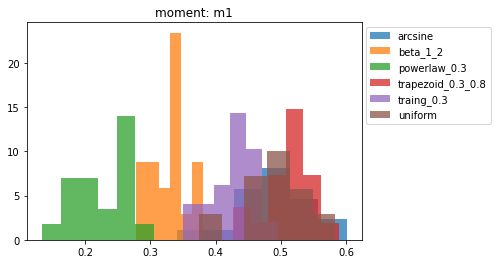

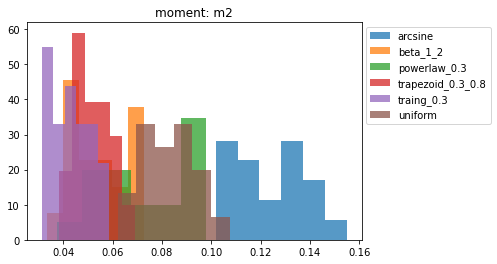

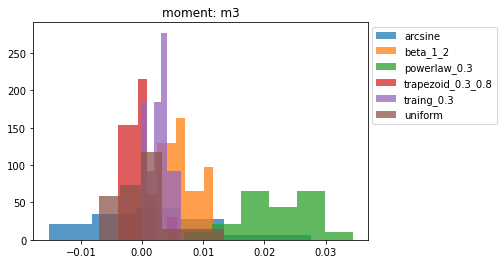

In [8]:
dem.get_histogram_of_moments(moments_df)

In [9]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
nr_moments_list = np.arange(2,21)

### svm

In [30]:
res_svm = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, n_folds, 1)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [36]:
res_svm.to_csv('results/moments/res_svm_bounded.csv')

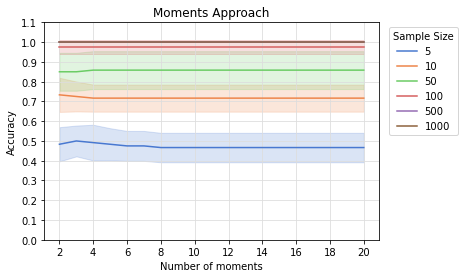

In [39]:
cm.plot_cv_moments(res_svm)

### Logistic Regression

In [10]:
res_lr = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, n_folds, 2)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [41]:
res_lr.to_csv('results/moments/res_lr_bounded.csv')

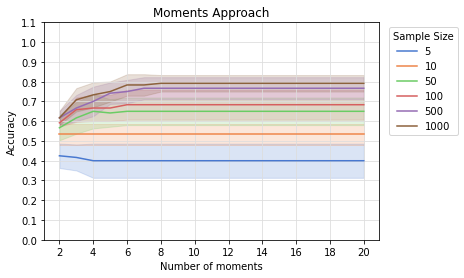

In [42]:
cm.plot_cv_moments(res_lr)

## Heavytail distributions

In [43]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [18]:
nr_moments=3
moments_df = dem.get_moments(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,label
0,0.839413,0.355249,0.185491,cauchy
1,0.874340,0.749412,1.291102,cauchy
2,0.792648,0.439343,0.462312,cauchy


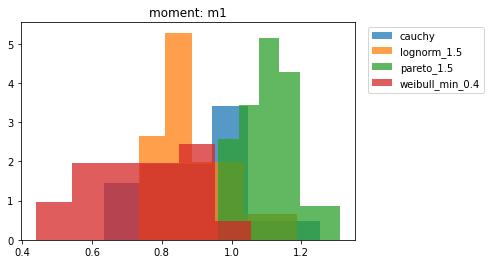

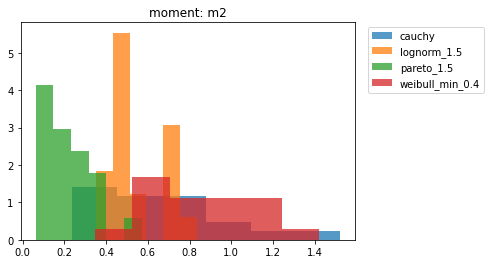

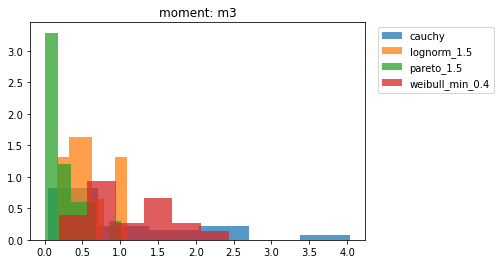

In [19]:
dem.get_histogram_of_moments(moments_df)

### SVM

In [44]:
res_svm_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample, n_folds, 1, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [45]:
res_svm_ht.to_csv('results/moments/res_svm_heavytail.csv')

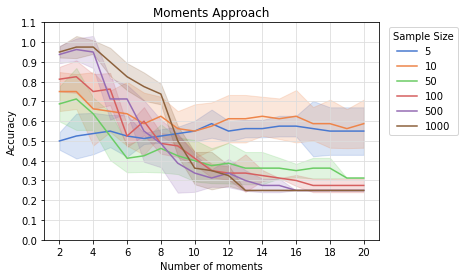

In [46]:
cm.plot_cv_moments(res_svm_ht)

### Logistic Regression

In [47]:
res_lr_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample, n_folds, 2, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1515: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1515: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1515: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1515: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1515: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_inverse_diag) ** 2
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1515: Runti

In [48]:
res_lr_ht.to_csv('results/moments/res_lr_heavytail.csv')

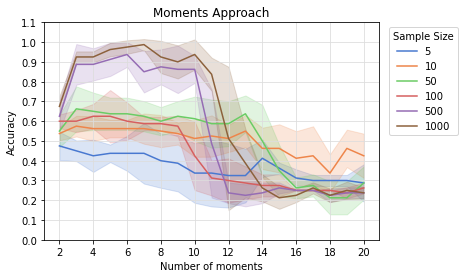

In [49]:
cm.plot_cv_moments(res_lr_ht)